In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split


In [2]:
us_data = pd.read_csv('adult-all.csv')
us_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
us_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary            object
dtype: object

In [4]:
us_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64

In [5]:
us_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
us_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [7]:
# Remove the ? sign and assign those as nan values
us_data['age'] = us_data['age'].replace('?' , np.nan )
us_data['workclass'] = us_data['workclass'].replace('?' , np.nan )
us_data['fnlwgt'] = us_data['fnlwgt'].replace('?' , np.nan )
us_data['education'] = us_data['education'].replace('?' , np.nan )
us_data['education-num'] = us_data['education-num'].replace('?' , np.nan )
us_data['marital-status'] = us_data['marital-status'].replace('?' , np.nan )
us_data['occupation'] = us_data['occupation'].replace('?' , np.nan )
us_data['relationship'] = us_data['relationship'].replace('?' , np.nan )
us_data['race'] = us_data['race'].replace('?' , np.nan )
us_data['sex'] = us_data['sex'].replace('?' , np.nan )
us_data['capital-gain'] = us_data['capital-gain'].replace('?' , np.nan )
us_data['capital-loss'] = us_data['capital-loss'].replace('?' , np.nan )
us_data['hours-per-week'] = us_data['hours-per-week'].replace('?' , np.nan )
us_data['native-country'] = us_data['native-country'].replace('?' , np.nan )
us_data['Salary'] = us_data['Salary'].replace('?' , np.nan )

In [8]:
us_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [9]:
us_data.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
Salary               0
dtype: int64

In [10]:
us_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
### All null values replace with their mode values (Because all are categorical data)

us_data['workclass'] = us_data['workclass'].fillna(us_data['workclass'].mode()[0])
us_data['occupation'] = us_data['occupation'].fillna(us_data['occupation'].mode()[0])
us_data['native-country'] = us_data['native-country'].fillna(us_data['native-country'].mode()[0])


In [12]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  Salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
us_data.duplicated().sum()
### There are 53 points duplicates. 
### Remove the all duplicates from the dataset

53

In [14]:
us_data.shape

(48842, 15)

In [15]:
us_data = us_data.drop_duplicates(keep= 'first')
us_data.shape

(48789, 15)

# Exploratory Data Analysis

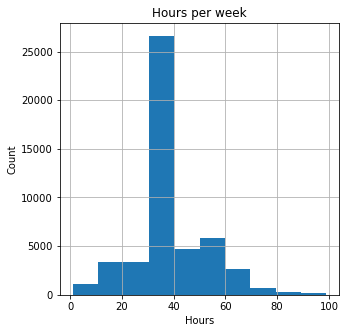

In [16]:
us_data['hours-per-week'].hist(figsize=(5,5))
plt.title('Hours per week')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

#In this data the hours per week atrribute varies within the range of 1 to 99. 
#By observayion,30-40 hrs people work per week,around 27000 people. 
#There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

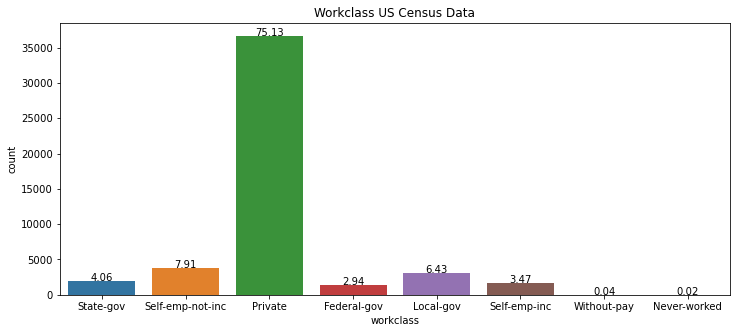

In [17]:
plt.figure(figsize=(12,5))

total = float(len(us_data['Salary']))

a = sns.countplot(x='workclass',data=us_data)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.title('Workclass US Census Data')
plt.show()

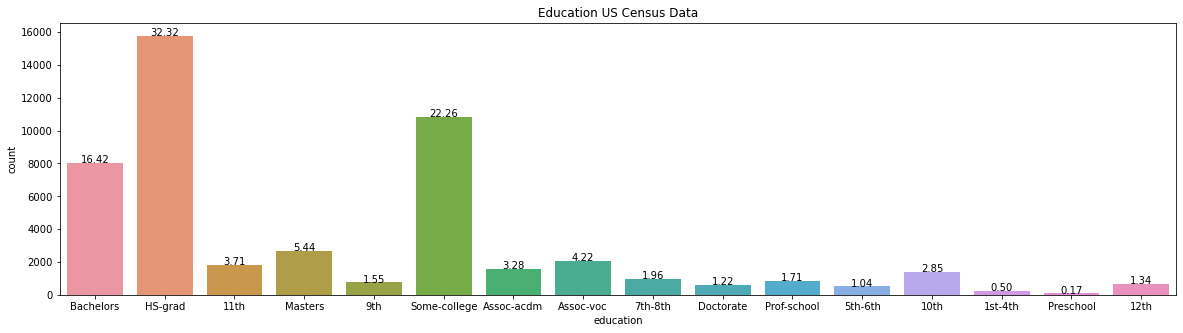

In [18]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=us_data)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.title('Education US Census Data')
plt.show()
    
    
    #Hs-grad has 32.32% of all the education attribute. pre-school has min.

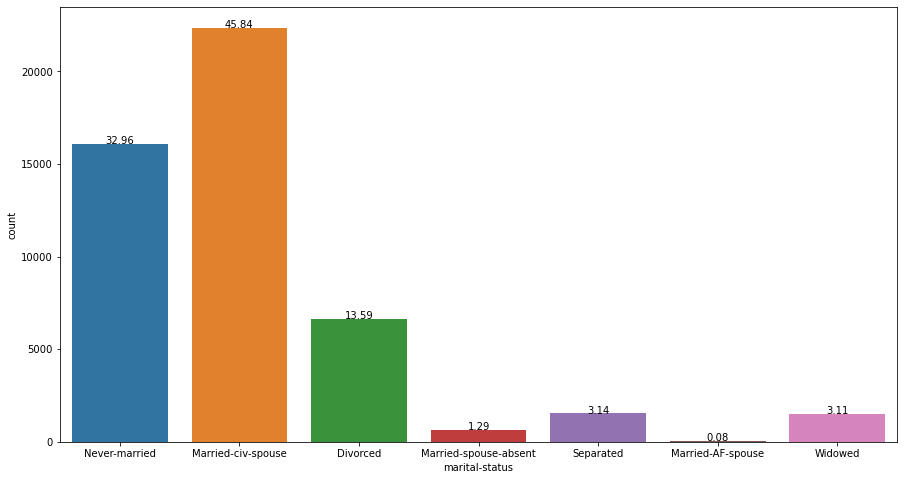

In [19]:
plt.figure(figsize=(15,8))
total = float(len(us_data) )

ax = sns.countplot(x="marital-status", data=us_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

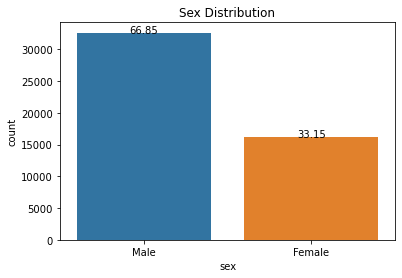

In [20]:
# plt.figure(figsize=(5,5))
total = float(len(us_data) )

ax = sns.countplot(x="sex", data=us_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Sex Distribution')
plt.show()

## frequency of male is higher than female.

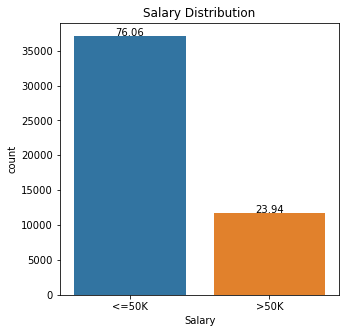

In [21]:
plt.figure(figsize=(5,5))
total = float(len(us_data) )

ax = sns.countplot(x="Salary", data=us_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Salary Distribution')
plt.show()

#### In income there is 2 group,group1(who earns more than 50k) 
### 23.93% belong to income and group2(who earns less than 50k) 76% belong to income

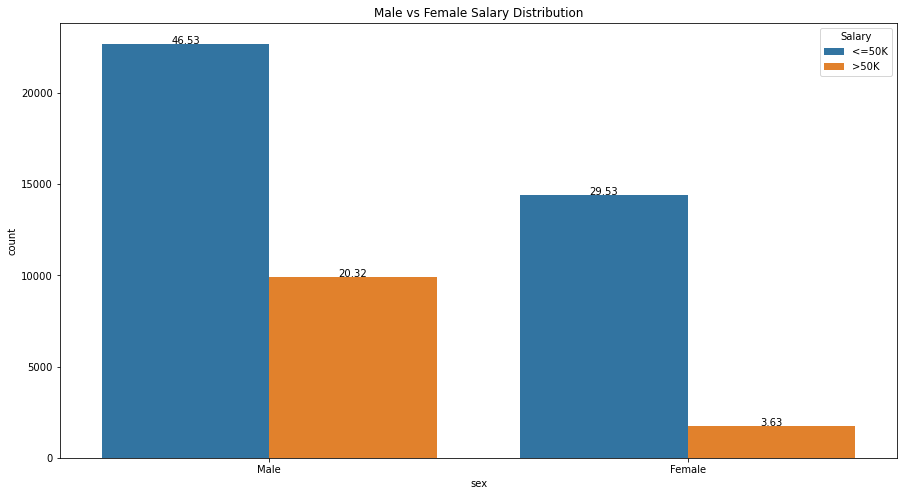

In [22]:

plt.figure(figsize=(15,8))
total = float(len(us_data) )

ax = sns.countplot(x="sex",hue = "Salary", data=us_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.title('Male vs Female Salary Distribution')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

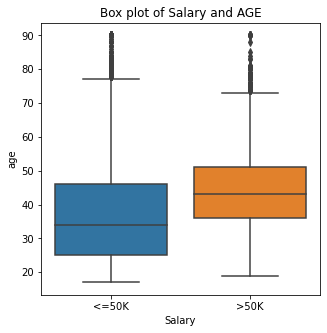

In [23]:
#Box plots
#--------------------------------------------------------------------------------
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='Salary',y='age',data=us_data).set_title('Box plot of Salary and AGE')
plt.show


### Income group(<=50k) has lower median "age"(34 year) 
### than the Income group(>50k) which has median "age"(42 year).

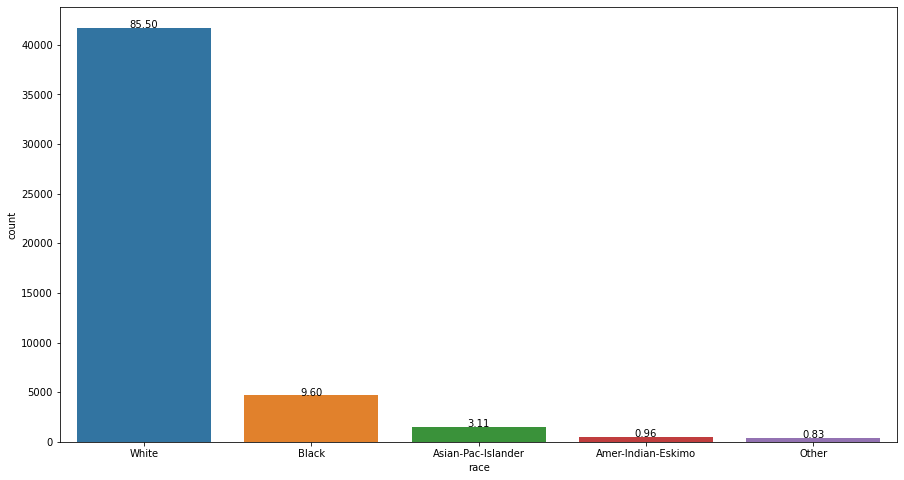

In [24]:
plt.figure(figsize=(15,8))
total = float(len(us_data) )

ax = sns.countplot(x="race", data=us_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### white is maximun among all about 85.50%. black is second maximun.

<AxesSubplot:>

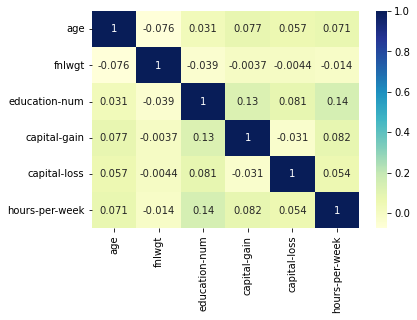

In [25]:
sns.heatmap(us_data.corr(), cmap="YlGnBu",annot=True)

# Model

In [26]:
# If Sex is Female its value is set to 0 and Male is set to 1
us_data['sex'] = us_data['sex'].str.replace('Female', '0')
us_data['sex'] = us_data['sex'].str.replace('Male', '1')

In [27]:
##Treating the target variable(if income >50k then it is 1 else it is 0)
us_data["Salary"] = us_data["Salary"].apply(lambda x:1 if x == ">50K" else 0)
us_data["Salary"].value_counts()

0    37108
1    11681
Name: Salary, dtype: int64

In [28]:
## Seperate the target variable -- Salary

X = us_data.drop(['Salary'], axis=1)
y = us_data['Salary']

### Split data into training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [29]:
## Encode categorical variables
from sklearn import preprocessing
categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
               'native-country']
for feature in categorical:
        label = preprocessing.LabelEncoder()
        X_train[feature] = label.fit_transform(X_train[feature])
        X_test[feature] = label.transform(X_test[feature])

In [30]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.024162,0.810118,-0.162750,-0.333669,1.136013,-0.413619,0.714857,-0.899027,0.392540,0.704242,-0.145192,-0.218822,0.768911,0.259305
1,0.024162,-2.778138,1.880272,-0.333669,1.136013,0.914719,1.469395,0.973467,-1.963485,0.704242,-0.145192,-0.218822,-0.036553,0.259305
2,-0.924686,-0.086946,-0.428459,-0.591876,0.356742,-1.741956,1.217882,0.973467,0.392540,-1.419967,-0.064987,-0.218822,-0.439285,0.259305
3,1.994848,-0.086946,1.860080,-2.399323,-1.201799,-0.413619,0.211831,-0.899027,0.392540,0.704242,1.286747,-0.218822,-0.036553,0.259305
4,-0.048826,-0.086946,1.363147,-0.333669,1.136013,-0.413619,0.714857,-0.899027,0.392540,0.704242,1.883422,-0.218822,2.379839,0.259305


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix


model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7437
           1       0.64      0.59      0.61      2321

    accuracy                           0.82      9758
   macro avg       0.76      0.74      0.75      9758
weighted avg       0.82      0.82      0.82      9758



<AxesSubplot:>

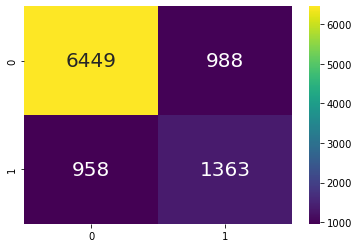

In [32]:
## Before applying best fit k value
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)
con=confusion_matrix(y_test,pred)

## Heat Map to depict the Confusion Matrix
sns.heatmap(con,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})


In [33]:
# printing precision,recall,accuracy score etc
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7437
           1       0.58      0.59      0.58      2321

    accuracy                           0.80      9758
   macro avg       0.73      0.73      0.73      9758
weighted avg       0.80      0.80      0.80      9758



In [34]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    predict_i=model.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.1994261119081779,
 0.17852018856323018,
 0.17780282844845255,
 0.17062922730067637,
 0.16878458700553392,
 0.16314818610370976,
 0.16099610575937692,
 0.1595613855298217,
 0.15966386554621848,
 0.16007378561180569,
 0.15925394548063126,
 0.16007378561180569,
 0.15925394548063126,
 0.15822914531666324,
 0.15802418528386963,
 0.15771674523467924,
 0.15915146546423448,
 0.15833162533306006,
 0.15935642549702808,
 0.15802418528386963,
 0.1595613855298217,
 0.15884402541504405,
 0.15986882557901208,
 0.15935642549702808,
 0.1595613855298217,
 0.15853658536585366,
 0.15894650543144087,
 0.15740930518548882,
 0.15730682516909203,
 0.156794425087108]

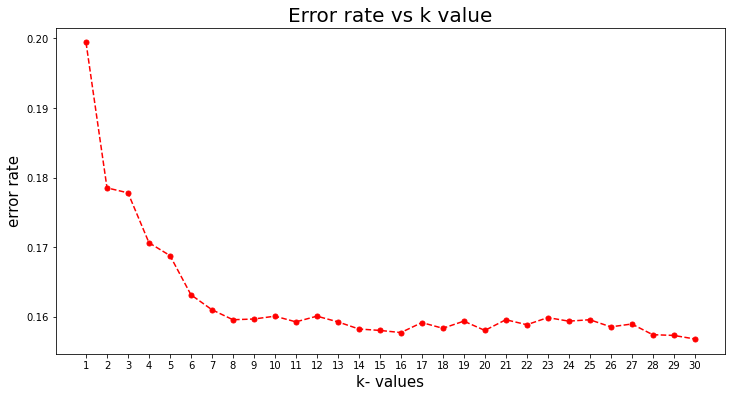

In [35]:
## output will be the list of average value of error rate for each iteration of k.
#plotting the error rate vs k graph

plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="red",
         linestyle="dashed",color="red",markersize=5)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=15)
plt.ylabel("error rate",fontsize=15)
plt.xticks(range(1,31))
plt.show()


### As we see in above figure after k=23 the fluctuation in error rate is not much . 
## Hence whenever we will see the threshold value after which k-value is not fluctuating more we will 
## select that specific threshold value as k value.


In [36]:
error_rate.index(min(error_rate))

29

<AxesSubplot:>

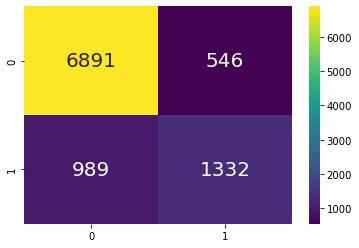

In [37]:
## After applying best fit k value

clf=KNeighborsClassifier(n_neighbors=29)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)



## Heat Map to depict the Confusion Matrix
sns.heatmap(con_mat,cmap="viridis",annot=True,fmt=".0f",annot_kws= {"size":20})

In [38]:
print(classification_report(y_test,predicted_value))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7437
           1       0.71      0.57      0.63      2321

    accuracy                           0.84      9758
   macro avg       0.79      0.75      0.77      9758
weighted avg       0.84      0.84      0.84      9758

